In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('tips.xlt')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Задание 1
Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150.

In [5]:
len(df)

244

#### Задание 2
Напишите максимальную сумму счёта в датафрейме. Ответ введите с точностью до двух цифр после запятой, например:100.55.

In [6]:
df.total_bill.max()

50.81

In [7]:
# ***********************************************************************************************

In [8]:
%matplotlib inline

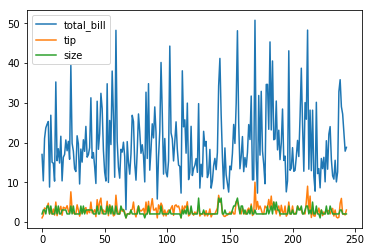

In [9]:
df.plot()

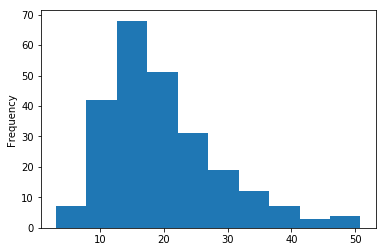

In [10]:
df['total_bill'].plot(kind = 'hist')

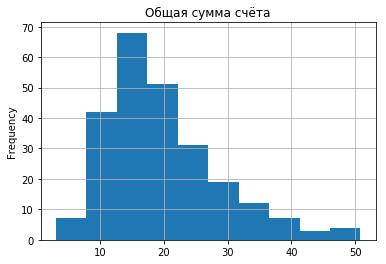

In [11]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

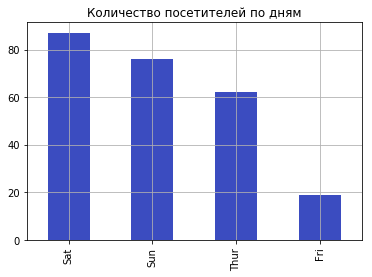

In [12]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

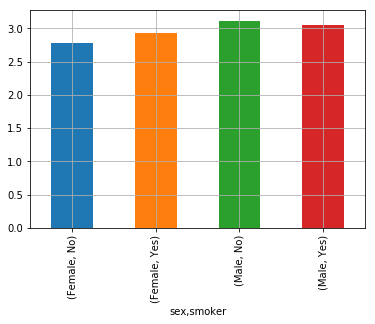

In [13]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008E5B908>,
      dtype=object)

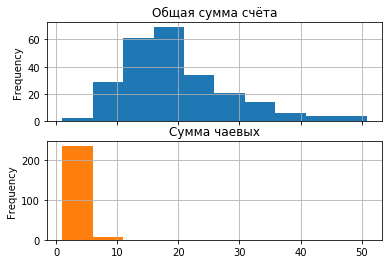

In [14]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

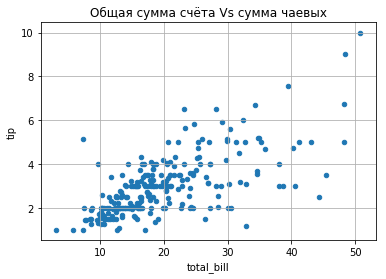

In [15]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

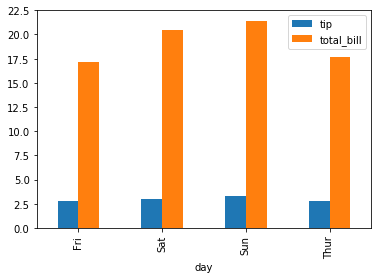

In [16]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

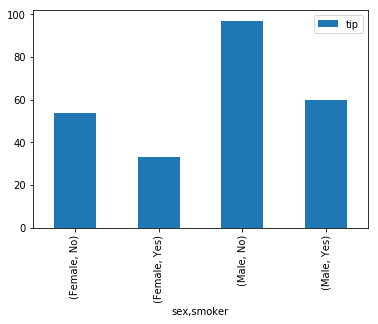

In [17]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

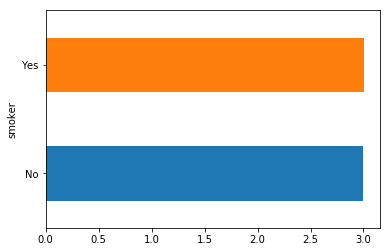

In [18]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh')

In [19]:
# **************************************************************************************

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.xlt')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

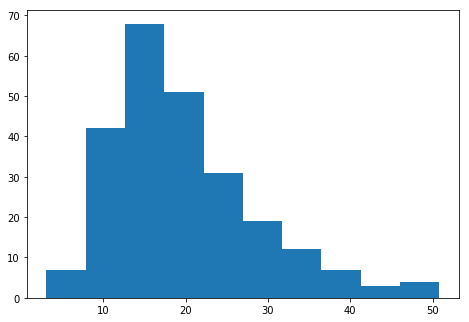

In [21]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5,0,'Сумма заказа, USD')

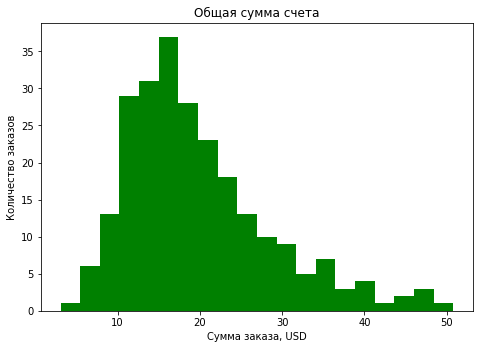

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0,0.5,'Размер чаевых')

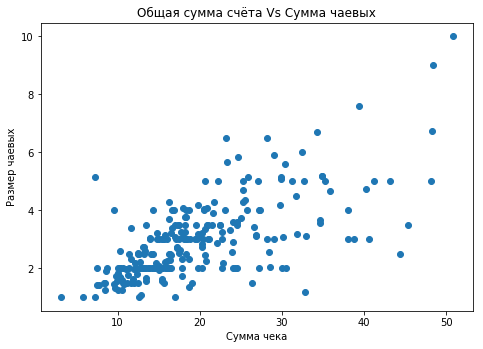

In [23]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

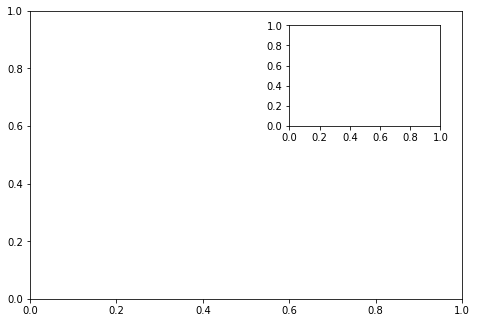

In [24]:
fig = plt.figure()
axes_main = fig.add_axes([0, 0, 1, 1])
axes_insert = fig.add_axes([0.6, 0.6, 0.35, 0.35])

In [25]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

In [26]:
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

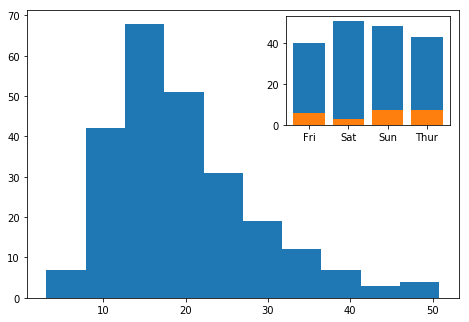

In [27]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

<BarContainer object of 4 artists>

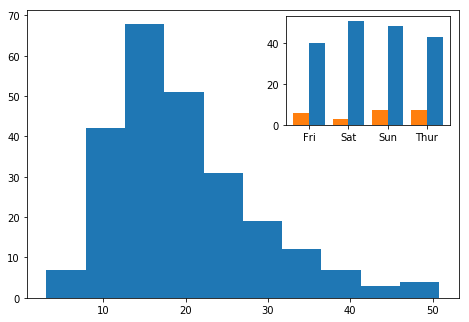

In [28]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

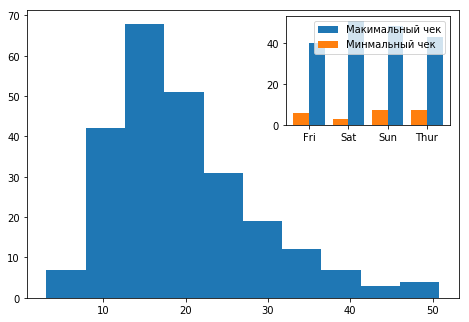

In [29]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Макимальный чек')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минмальный чек')
insert_axes.legend(loc = 1)

(0, 90)

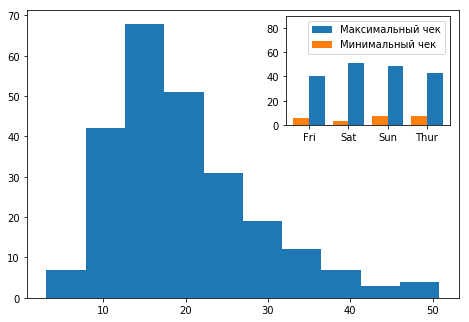

In [30]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальный чек')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальный чек')
insert_axes.legend(loc = 1)
insert_axes.set_ylim(0,90)

In [31]:
# **********************************************************************************

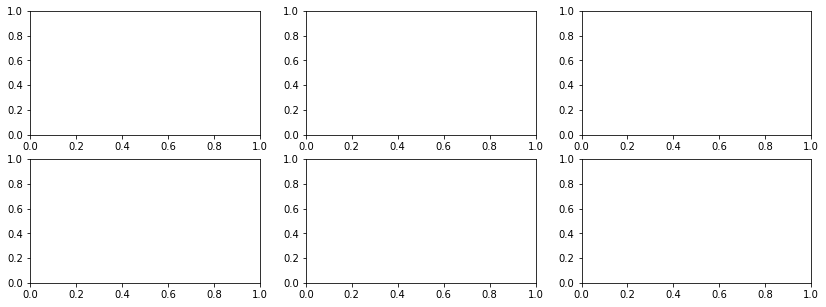

In [32]:
fig, axes = plt.subplots(2,3,figsize = (14,5))

Text(0.5,1,'Total_bill Vs Tip')

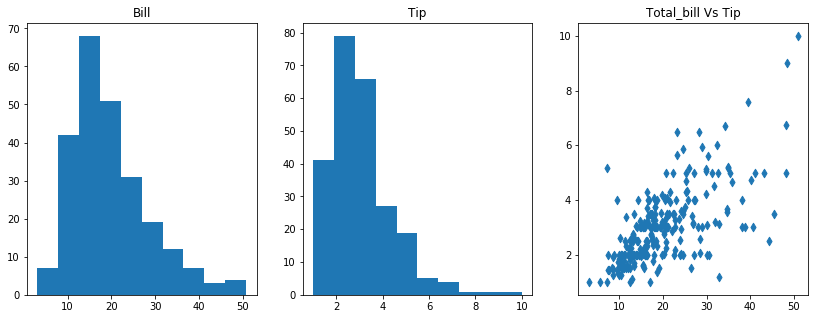

In [33]:
fig, axes = plt.subplots(1,3,figsize = (14,5))
axes[0].hist(df.total_bill)
axes[0].set_title('Bill')
axes[1].hist(df.tip)
axes[1].set_title('Tip')
axes[2].scatter(df.total_bill,df.tip, marker = 'd')
axes[2].set_title('Total_bill Vs Tip')

Text(0.5,1,'Total_bill Vs Tip')

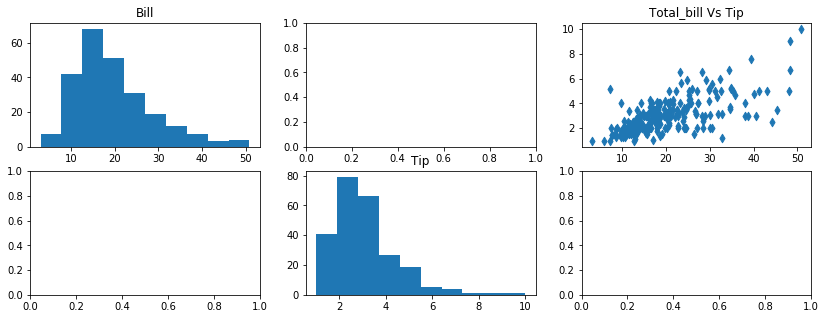

In [38]:
fig, axes = plt.subplots(2,3,figsize = (14,5))
axes[0,0].hist(df.total_bill)
axes[0,0].set_title('Bill')
axes[1,1].hist(df.tip)
axes[1,1].set_title('Tip')
axes[0][2].scatter(df.total_bill,df.tip, marker = 'd')  # <====================[][]
axes[0][2].set_title('Total_bill Vs Tip')  # <====================[][]

In [ ]:
# *********************************************************************************************************

In [39]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

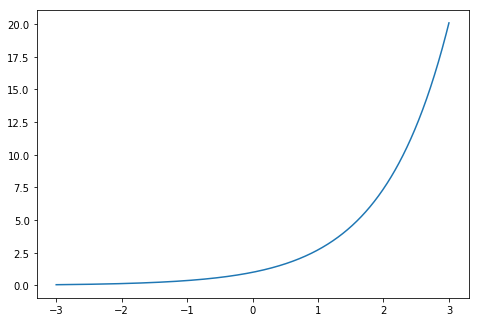

In [40]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

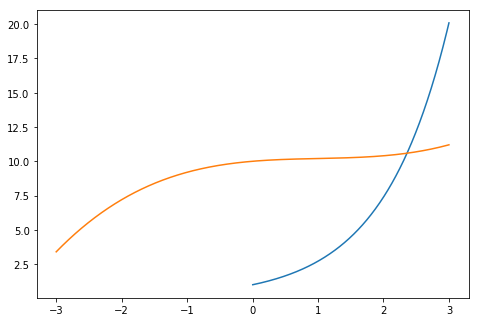

In [41]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

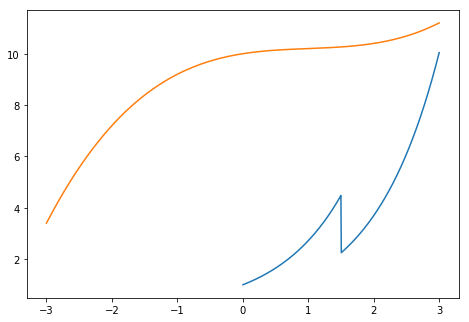

In [51]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], np.append(y1[500:750],y1[750:]*0.5)) 
axes.plot(x, y2)

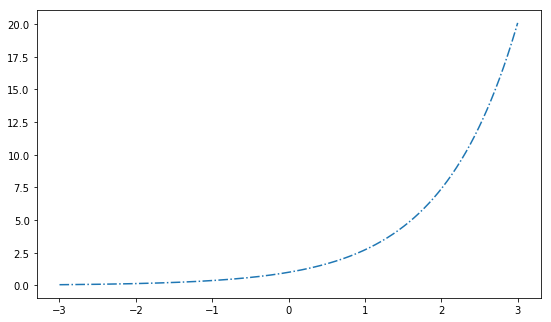

In [66]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='-.')

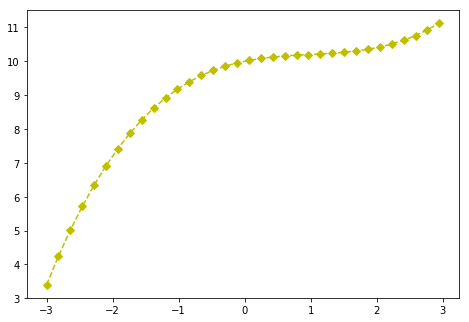

In [70]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'yD--')

In [71]:
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [72]:
import warnings; warnings.simplefilter('ignore')

In [82]:
df = pd.read_csv('tips.xlt')

In [85]:
sns.set()

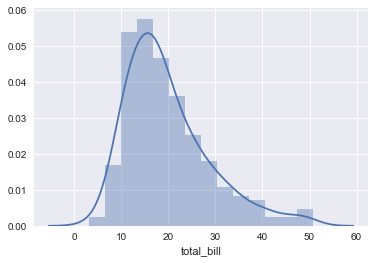

In [86]:
sns.distplot(df.total_bill)

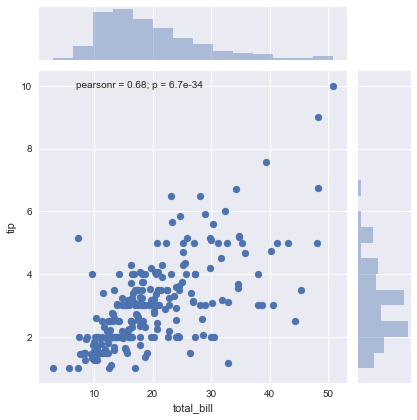

In [90]:
sns.jointplot(x = 'total_bill',y = 'tip', data = df)

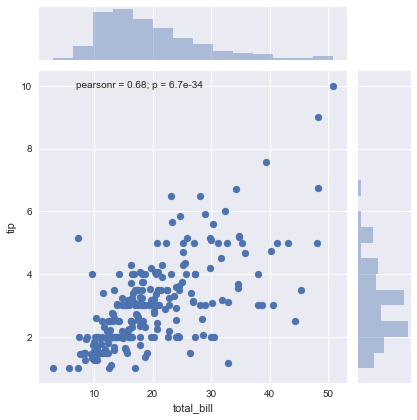

In [87]:
sns.jointplot(df.total_bill,df.tip)

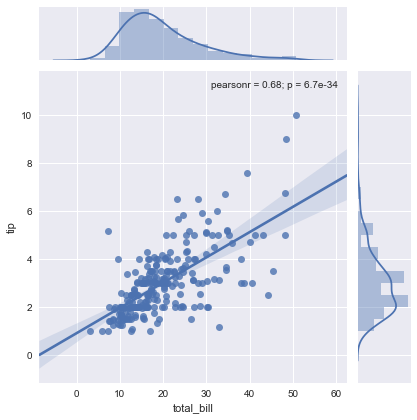

In [88]:
sns.jointplot(df.total_bill,df.tip,kind = 'reg')

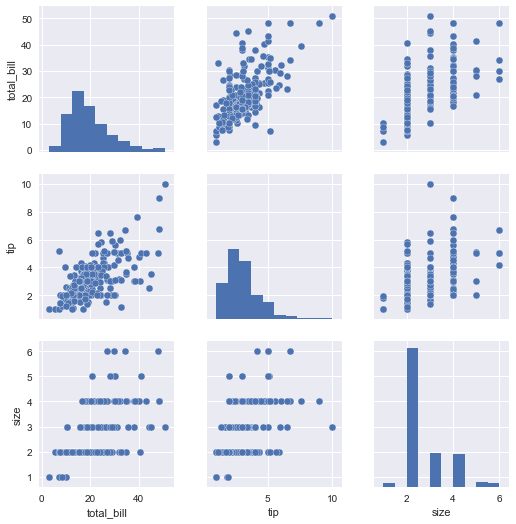

In [91]:
sns.pairplot(df)

In [ ]:
kind = 'hex'

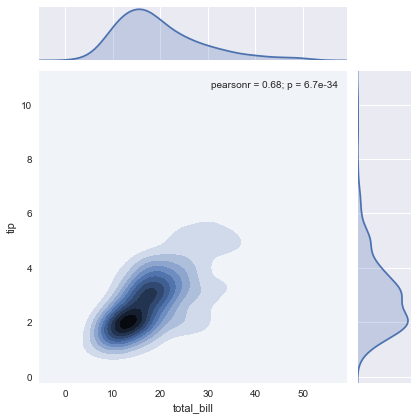

In [94]:
sns.jointplot(df.total_bill,df.tip,kind = 'kde')

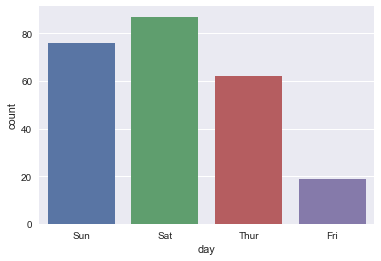

In [95]:
sns.countplot(df.day) # sns.countplot(x = 'day', data = df)

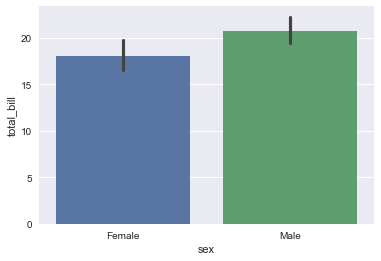

In [98]:
sns.barplot(df.sex,df.total_bill) # sns.barplot(df.total_bill,df.sex) 

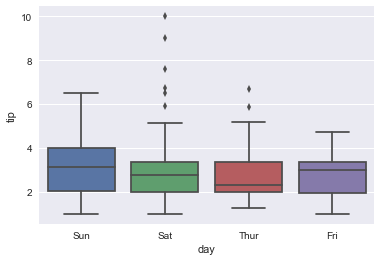

In [106]:
sns.boxplot(x = 'day', y = 'tip', data = df)  # sns.boxplot(df.day,df.tip)

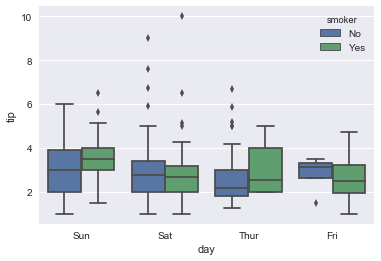

In [107]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

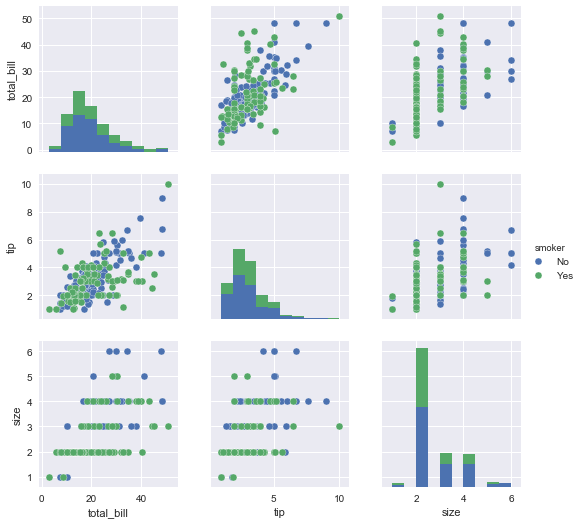

In [110]:
sns.pairplot(df, hue = 'smoker')

In [112]:
correlation = df.corr()

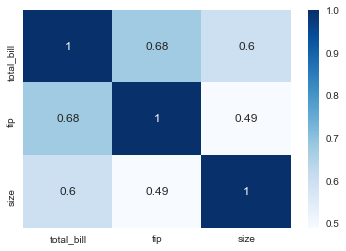

In [120]:
sns.heatmap(correlation,annot=True,cmap='Blues')

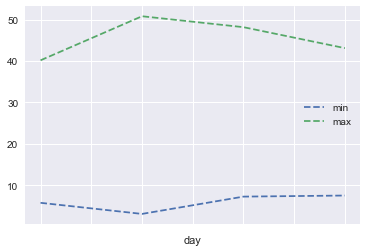

In [123]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot(linestyle = '--')